In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SHIBUSDT_1m_1h-pump05_210510_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2021-05-10 11:00:00,0.000014,0.000050,0.000014,0.000033,1.051269e+12,58171.0,7.120811e+11,2.728068e+07,0,...,NaN,2.099369,1.087273,0.677354,NaN,NaN,NaN,0.354707,NaN,0.344828
1,2021-05-10 11:01:00,0.000033,0.000034,0.000030,0.000032,4.840406e+11,26739.0,2.771165e+11,9.101184e+06,0,...,NaN,1.339218,0.139925,0.572507,NaN,NaN,NaN,0.145013,NaN,0.344828
2,2021-05-10 11:02:00,0.000032,0.000032,0.000030,0.000030,3.329267e+11,17331.0,1.793448e+11,5.579455e+06,0,...,NaN,1.167747,0.071878,0.538692,NaN,NaN,NaN,0.077383,NaN,0.344828
3,2021-05-10 11:03:00,0.000030,0.000031,0.000030,0.000030,3.199571e+11,17901.0,1.434040e+11,4.316279e+06,0,...,NaN,0.812242,0.019327,0.448197,NaN,NaN,NaN,-0.103605,NaN,0.344828
4,2021-05-10 11:04:00,0.000030,0.000030,0.000027,0.000027,2.492414e+11,13129.0,1.001472e+11,2.923990e+06,0,...,NaN,0.671705,0.118889,0.401808,NaN,NaN,NaN,-0.196384,NaN,0.344828


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SHIBUSDT"
start_date = "2021-05-10"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(             open      high       low     close        volume  num_trades  \
 0        0.000014  0.000050  0.000014  0.000033  1.051269e+12     58171.0   
 1        0.000033  0.000034  0.000030  0.000032  4.840406e+11     26739.0   
 2        0.000032  0.000032  0.000030  0.000030  3.329267e+11     17331.0   
 3        0.000030  0.000031  0.000030  0.000030  3.199571e+11     17901.0   
 4        0.000030  0.000030  0.000027  0.000027  2.492414e+11     13129.0   
 ...           ...       ...       ...       ...           ...         ...   
 1960145  0.000019  0.000019  0.000019  0.000019  1.711856e+08       224.0   
 1960146  0.000019  0.000019  0.000019  0.000019  2.327248e+08       237.0   
 1960147  0.000019  0.000019  0.000019  0.000019  2.844983e+08       248.0   
 1960148  0.000019  0.000019  0.000019  0.000019  2.875280e+08       256.0   
 1960149  0.000019  0.000019  0.000019  0.000019  1.372437e+08        32.0   
 
          taker_buy_base  taker_buy_quote    1m_roc  30m_volat

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.5, min_precision=0.6)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.7132


np.float64(0.7131929093606)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.7132
AUC-ROC Score: 0.9981

Overall Metrics:
Accuracy:  0.9980
Precision: 0.9979
Recall:    0.9980
F1-Score:  0.9977

Class 0 Metrics:
Precision: 0.9981
Recall:    0.9999
F1-Score:  0.9990

Class 1 Metrics:
Precision: 0.9394
Recall:    0.5345
F1-Score:  0.6813

Using raw probabilities
Classification threshold: 0.7132
{'accuracy': 0.9979861577278304, 'precision': 0.9978842038422788, 'recall': 0.9979861577278304, 'f1': 0.9977104078557699, 'auc_roc': np.float64(0.998130684582175), 'optimal_threshold': np.float64(0.7131929093606), 'precision_0': 0.9981207368567584, 'recall_0': 0.9998605526762265, 'f1_0': 0.99898988726213, 'precision_1': 0.9393939393939394, 'recall_1': 0.5344827586206896, 'f1_1': 0.6813186813186813}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 0.20% of total SHAP value magnitude
Top 20 features explain 96.22% of total SHAP value magnitude
Ratio (Top/Bottom): 479.40x


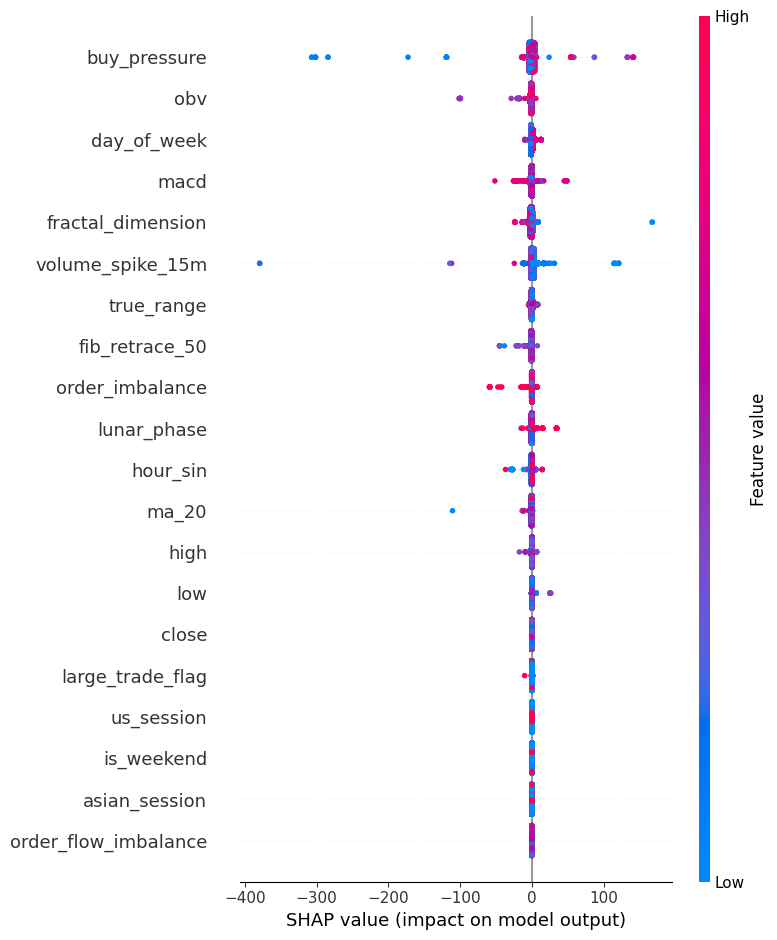

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 7.13% of total importance
Top 20 features explain 73.46% of total importance
Ratio (Top/Bottom): 10.30x


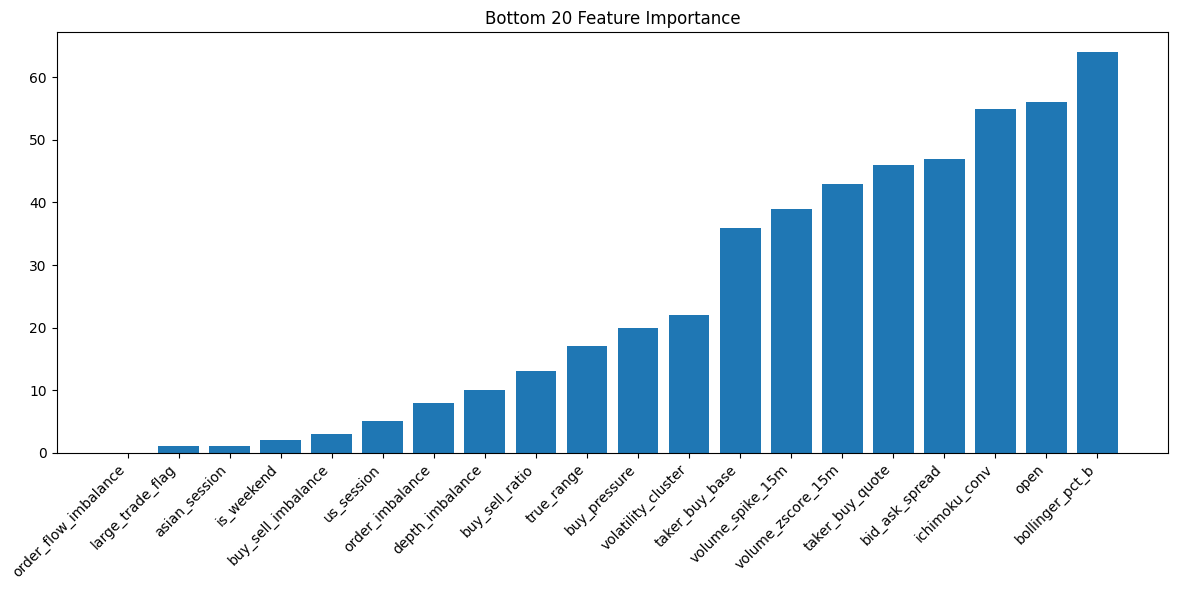

In [6]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()